In [1]:
from sklearn.externals import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

/home/ec1018/anaconda3/envs/atf/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [72]:
def to_rgb(img, mult_ch=True):
    '''https://github.com/keras-team/keras/issues/11208'''
    # img = img * 255
    # img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    # img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.float32)
    if mult_ch:
        img_rgb = np.asarray(np.dstack((img, img, img)))
    else:
        img_rgb = np.asarray(img)
    return img_rgb

def set_to_rgb(t_set, mult_ch=True):
    rgb_list = []
    #convert x_train data to rgb values
    for i in range(len(t_set)):
        rgb = to_rgb(t_set[i], mult_ch)
        rgb_list.append(rgb)
        #print(rgb.shape)
        rgb_arr = np.stack([rgb_list],axis=4)
    rgb_arr_to_3d = np.squeeze(rgb_arr, axis=4)
    return rgb_arr_to_3d

def get_test_angle_normal(all_test, angle, fgsm=False, debug=True, mult_ch=True):
    (x_test, y_test) = np.copy(all_test[str(angle)][0]), np.copy(all_test[str(angle)][1])
    # If we are using the saved fgsm images, those are already normalized
    if fgsm == False:
        if debug: print("Dividing by 255...")
        x_test *= (1.0/255)
    x_test = set_to_rgb(x_test, mult_ch)
    return (x_test, y_test)

In [3]:
# Load actual images
img_size = 224
test_set_name = "greebles10_test_-90_90_1_224.npy".format(img_size)

render_folder = os.path.join(os.getcwd(), "..", "greebles_10") 
set_mode = 'specific_all'
set_type = 'specific_angle'
source_folder = os.path.join(render_folder, "greebles_tf-" + set_mode, set_type)
test_set_path = os.path.join(source_folder, test_set_name)
all_test = joblib.load(test_set_path)
labels = {0: 'f-1', 1: 'f-2', 2: 'f-3', 3: 'f-4', 4: 'f-5', 5: 'm-1', 6: 'm-2', 7: 'm-3', 8: 'm-4', 9: 'm-5'}

In [4]:
###### Choose the data to load ######

extra = 'rgb_none'
# extra = 'rgb_imagenet'

# extra = 'rgb_imagenet_noAT'
# extra = 'rgb_imagenet_AT'

# extra = 'rgb_imagenet_noAT2'
# extra = 'rgb_imagenet_AT2'

In [5]:
# Don't change any of these
method_vis = ['saliency', 'gradcam']
method_vis_select = method_vis[1]
view_pred_class = [0, 1, 2, 'None'][0]

grads_filename = os.path.join("grad_data", "{}{}_{}_{}_{}.npy".format(method_vis_select, view_pred_class, img_size, extra, test_set_name.split('_')[1]))

print(grads_filename)

grad_data/gradcam0_224_rgb_none_test.npy


In [6]:
# Load gradcam data
all_grads = joblib.load(grads_filename)
print(all_grads.keys())
print("-"*15)
print(all_grads['0'].keys())

dict_keys(['-90', '-89', '-88', '-87', '-86', '-85', '-84', '-83', '-82', '-81', '-80', '-79', '-78', '-77', '-76', '-75', '-74', '-73', '-72', '-71', '-70', '-69', '-68', '-67', '-66', '-65', '-64', '-63', '-62', '-61', '-60', '-59', '-58', '-57', '-56', '-55', '-54', '-53', '-52', '-51', '-50', '-49', '-48', '-47', '-46', '-45', '-44', '-43', '-42', '-41', '-40', '-39', '-38', '-37', '-36', '-35', '-34', '-33', '-32', '-31', '-30', '-29', '-28', '-27', '-26', '-25', '-24', '-23', '-22', '-21', '-20', '-19', '-18', '-17', '-16', '-15', '-14', '-13', '-12', '-11', '-10', '-9', '-8', '-7', '-6', '-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', 

Dividing by 255...
0.08627450980392157
0.9686274509803922


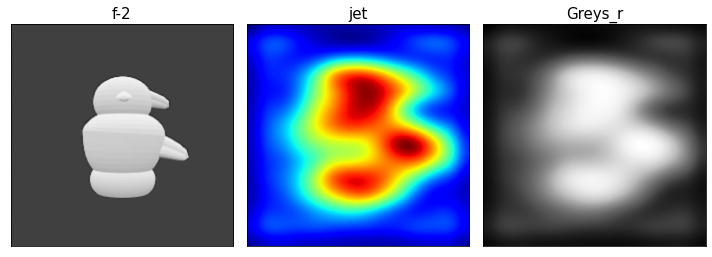

In [7]:
angle_used = 90
class_idx = 1

# Original Image
fig, ax = plt.subplots(1, 3, figsize=(10,6))
(x_test, y_test) = get_test_angle_normal(all_test, angle=angle_used)
indices = np.where(y_test[:, class_idx] == 1.)[0]
idx = indices[0]
ax[0].set_title(labels[class_idx], fontsize=15)
ax[0].imshow(x_test[idx], cmap='Greys_r')
ax[0].set_xticks([])
ax[0].set_yticks([])

# Debug
print(np.amin(x_test))
print(np.amax(x_test))

for i, cmap in enumerate(['jet', 'Greys_r']):
    grads = all_grads[str(angle_used)][class_idx]
    ax[i+1].set_title(cmap, fontsize=15)
    ax[i+1].imshow(grads, cmap=cmap)
    # ax[i+1].imshow(x_test[idx], cmap='Greys_r', alpha=0.30)
    ax[i+1].set_xticks([])
    ax[i+1].set_yticks([])
# fig.suptitle('Grad-CAM', fontsize=15, fontweight ="bold")
plt.tight_layout()

plt.show()

In [8]:
# angle_used = 0
# class_idx = 0
# grads = all_grads[str(angle_used)][class_idx]
print(grads.shape)
display(grads)

(224, 224)


array([[0.        , 0.00038835, 0.00150489, ..., 0.02809457, 0.027536  ,
        0.02734199],
       [0.00066587, 0.00105509, 0.00217414, ..., 0.02865529, 0.02809166,
        0.02789591],
       [0.00257456, 0.00296626, 0.00409256, ..., 0.03025997, 0.02968182,
        0.02948108],
       ...,
       [0.03125865, 0.03148211, 0.03212766, ..., 0.0312458 , 0.0304985 ,
        0.03023886],
       [0.02999711, 0.03021337, 0.03083824, ..., 0.02990045, 0.02916881,
        0.02891461],
       [0.02955636, 0.0297701 , 0.03038776, ..., 0.02943157, 0.02870538,
        0.02845308]], dtype=float32)

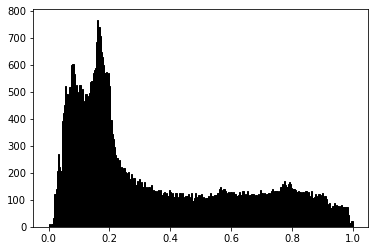

array([0.        , 0.00038835, 0.00150489, ..., 0.02943157, 0.02870538,
       0.02845308], dtype=float32)

In [16]:
plt.hist(grads.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()
grads.ravel()

In [10]:
# https://stats.stackexchange.com/questions/211377/skewness-and-kurtosis-in-an-image
# https://dsp.stackexchange.com/questions/30435/what-do-skewness-and-kurtosis-represent#:~:text=In%20digital%20image%20processing%20kurtosis,have%20a%20high%20kurtosis%20value.
# https://stats.stackexchange.com/questions/84158/how-is-the-kurtosis-of-a-distribution-related-to-the-geometry-of-the-density-fun
all_stats = [
    np.mean(grads),
    np.var(grads),
    skew(grads, axis=None),
    kurtosis(grads, axis=None)
]

print(all_stats)

[0.3488655, 0.0757075, 0.7810940742492676, -0.75767215702701]


[0.4375, 0.15234375, 0.22171590526858218, -1.3293885601577908]


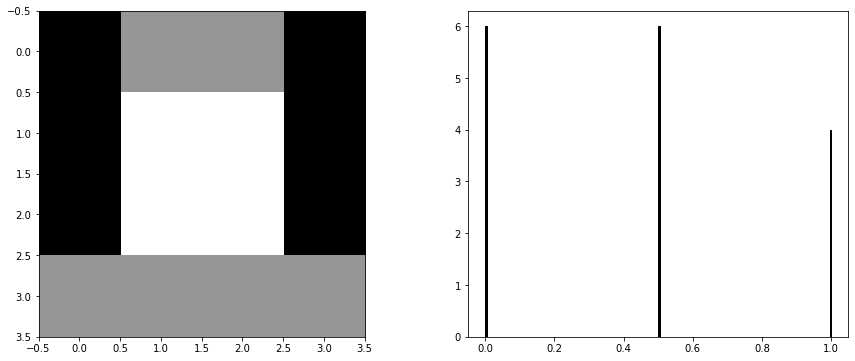

In [11]:
test_img = np.array([
    [0.0, 0.5, 0.5, 0.0],
    [0.0, 1.0, 1.0, 0.0],
    [0.0, 1.0, 1.0, 0.0],
    [0.5, 0.5, 0.5, 0.5]
])

all_stats = [
    np.mean(test_img),
    np.var(test_img),
    skew(test_img, axis=None),
    kurtosis(test_img, axis=None)
]

print(all_stats)
fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax[0].imshow(test_img, cmap='Greys_r')
ax[1].hist(test_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.show()

In [12]:
# Compare variances independent of angle? Use Levine's Test?
# Generate kind of a covariance matrix for each class, and compare similarity between different images of the same angle, or not just similarity per pixel but also mean, variance, etc
# How to calculate variance of a single sample in reference to a base one (i.e 0 deegrees) - we could measure how much the pixel intensities (min and max) vary from the default view.
# JS divergence for each probability column in the excel file.

# Do a graph of mean/variance/kurt/skew which would be one graph, two lines (one for each model), axis is angle and y is value?

# Start

In [48]:
from scipy.spatial import distance
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse

distance.jensenshannon([1.0, 0.0, 0.0], [1.0, 0.0, 0.0])

0.0

In [54]:
print(distance.jensenshannon(all_grads[str(0)][0].ravel(), all_grads[str(30)][0].ravel()))
print(ssim(all_grads[str(0)][0].ravel(), all_grads[str(90)][0].ravel()))
print(ssim(all_grads[str(0)][0], all_grads[str(90)][0]))

0.1041295094578297
0.725115761520349
0.6666450290363486


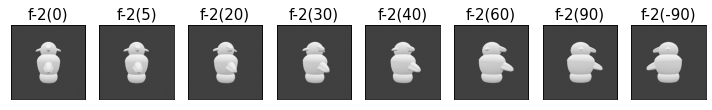

SSIM for 0 and 0: 1.0
SSIM for 0 and 5: 0.9843047575475531
SSIM for 0 and 20: 0.9587829575572556
SSIM for 0 and 30: 0.9456964697715114
SSIM for 0 and 40: 0.9330715811023409
SSIM for 0 and 60: 0.9114419674280515
SSIM for 0 and 90: 0.9057251054468362
SSIM for 0 and -90: 0.9064802482854518

MSE for 0 and 0: 0.0
MSE for 0 and 5: 0.0004375524719691798
MSE for 0 and 20: 0.0024358042849492736
MSE for 0 and 30: 0.004963060591883812
MSE for 0 and 40: 0.007567682097348744
MSE for 0 and 60: 0.011882069310567366
MSE for 0 and 90: 0.012468579649997253
MSE for 0 and -90: 0.012360451840049747


In [113]:
# Original Image
angles_used = [0, 5, 20, 30, 40, 60, 90, -90]
class_idx = 1
im_arr = {}
fig, ax = plt.subplots(1, len(angles_used), figsize=(10,6))
for i, angle_used in enumerate(angles_used):
    (x_test, y_test) = get_test_angle_normal(all_test, angle=angle_used, debug=False)
    indices = np.where(y_test[:, class_idx] == 1.)[0]
    idx = indices[0]
    ax[i].set_title("{}({})".format(labels[class_idx], angle_used), fontsize=15)
    ax[i].imshow(x_test[idx], cmap='Greys_r')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    im_arr[angle_used] = x_test[idx]
plt.tight_layout()

plt.show()

for k in im_arr.keys():
    print("SSIM for 0 and {}: {}".format(k, ssim(im_arr[0], im_arr[k], multichannel=True)))
print("")
for k in im_arr.keys():
    print("MSE for 0 and {}: {}".format(k, mse(im_arr[0], im_arr[k])))

0.9453921508330984


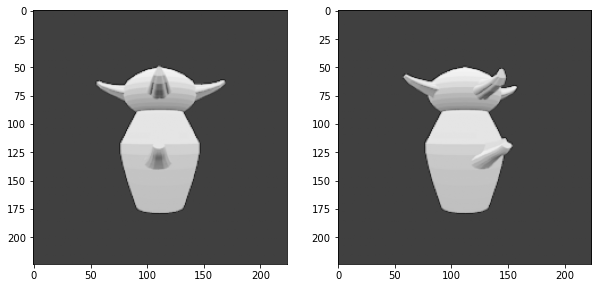

In [102]:
a = get_test_angle_normal(all_test, angle=0, debug=False)[0][0]
b = get_test_angle_normal(all_test, angle=30, debug=False)[0][0]
print(ssim(a,b, multichannel=True))

fig, ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].imshow(a, cmap='Greys_r')
ax[1].imshow(b, cmap='Greys_r')
plt.show()